<a href="https://colab.research.google.com/github/fabioantonini/transmission-factor/blob/main/Transmission_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from math import sqrt, exp, sinh
import cmath
import matplotlib.pyplot as plt

In [88]:
def T_by_matrix(E, V0, l):
    k = cmath.sqrt(E)
    beta = cmath.sqrt(V0 - E)
    M1 = np.array([[1, 1], [k*1j, -k*1j]])
    M2 = np.array([[1, 1], [-beta, beta]])
    M3 = np.array([[cmath.exp(-beta*l), cmath.exp(beta*l)], [-beta*cmath.exp(-beta*l), beta*cmath.exp(beta*l)]])
    M4 = np.array([[cmath.exp(1j*k*l), cmath.exp(-1j*k*l)], [1j*k*cmath.exp(1j*k*l), -1j*k*cmath.exp(-1j*k*l)]])

    V = np.dot(np.linalg.inv(M1), np.dot(M2, np.dot(np.linalg.inv(M3), M4)))
    print(f"The term V00 is: {V[0, 0]}")
    T = (1/abs(V[0, 0]))**2
    return T

In [83]:
def T_by_function(E, V0, l):
  E[np.where(E == V0)]++ 0.001 #To avoid discontinuity at E = V0 (Division by zero)
  k = np.sqrt(E)
  E1 = E[E < V0]
  beta1 = np.sqrt(V0 - E1)
  T_func1 = 1/(1 + ((V0 * np.sinh(beta1*l)**2)/(4*np.multiply(E1, V0-E1))))
  E2 = E[E > V0]
  beta2 = 1j*np.sqrt(E2 - V0)
  T_func2 = 1/(1 + ((V0 * np.sinh(beta2*l)**2)/(4*np.multiply(E2, V0-E2))))
  return E1, E2, T_func1, T_func2

In [89]:
E = 1
V0 = 2
if E == V0:
  E = E - 0.0001
l = 1

In [90]:
T = T_by_matrix(E, V0, l)
print(f"The value of the transmission coefficient is: {T}")
print("")

The term V00 is: (0.8337300251311491+1.2984575814159771j)
The value of the transmission coefficient is: 0.41997434161402614



In [99]:
e = np.linspace(0.0001, 4*V0, 1000)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


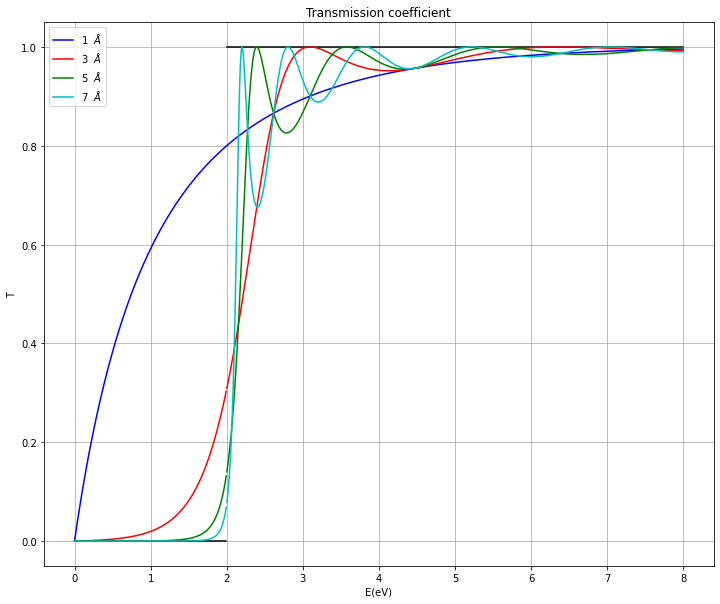

In [100]:
fig = plt.figure(figsize=(12,10))
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
lengths = []
maxlen=int(4*V0)
lenstep=2
lengths.extend(range(1,maxlen,lenstep))
lengths
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Transmission coefficient')
ax.set_ylabel('T')
ax.set_xlabel('E(eV)')
E1=e[e<V0]
E2=e[e>V0]
plt.plot(E1, np.zeros(E1.shape), 'k')
plt.plot(E2, np.ones(E2.shape), 'k')
for i, l in enumerate(lengths):
  E1, E2, T_func1, T_func2 = T_by_function(e, V0, l)
  plt.plot(E1, T_func1, c=colors[i], label = str(l) + "  $\AA$")
  plt.plot(E2, T_func2, c=colors[i])
# show the plot
plt.grid()
plt.legend()
plt.show()